In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 95% 155M/163M [00:00<00:00, 1.62GB/s]
100% 163M/163M [00:00<00:00, 1.57GB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_709.jpg', 'with_mask_1071.jpg', 'with_mask_1827.jpg', 'with_mask_1197.jpg', 'with_mask_3616.jpg']
['with_mask_488.jpg', 'with_mask_3563.jpg', 'with_mask_1466.jpg', 'with_mask_1990.jpg', 'with_mask_2617.jpg']


In [8]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2053.jpg', 'without_mask_3682.jpg', 'without_mask_1622.jpg', 'without_mask_3231.jpg', 'without_mask_759.jpg']
['without_mask_2586.jpg', 'without_mask_1312.jpg', 'without_mask_2164.jpg', 'without_mask_3414.jpg', 'without_mask_3212.jpg']


In [9]:
print('Number of mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of mask images: 3725
Number of without mask images: 3828


Creating Labela for the two class of Images

with mask-->1
without mask-->0

In [10]:
#create the labels

with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying Images

<function matplotlib.pyplot.show(close=None, block=None)>

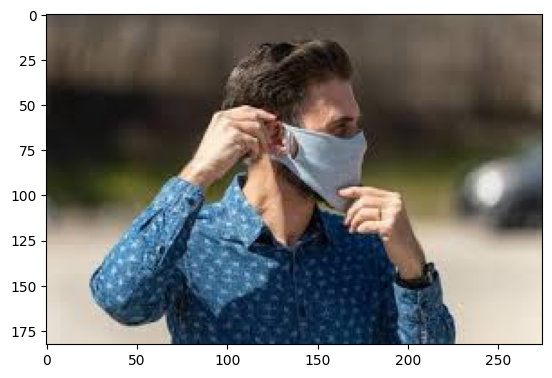

In [15]:
#displaying with mask image
img= mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot=plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

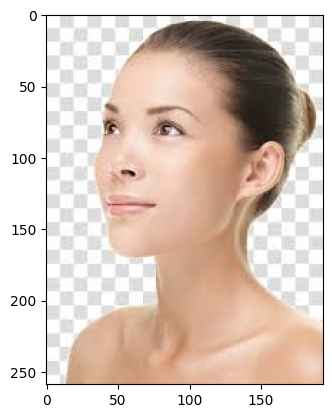

In [16]:
#displaying with mask image
img= mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot=plt.imshow(img)
plt.show

Image Processing
1. Resize the images
2. Convert the images to numpy arrays

In [17]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[ 33,  22,  18],
        [ 32,  21,  17],
        [ 28,  17,  13],
        ...,
        [190, 195, 192],
        [191, 197, 196],
        [192, 198, 199]],

       [[ 31,  20,  16],
        [ 31,  20,  16],
        [ 30,  19,  15],
        ...,
        [192, 197, 195],
        [191, 197, 196],
        [191, 197, 197]],

       [[ 35,  24,  20],
        [ 37,  26,  22],
        [ 42,  31,  27],
        ...,
        [196, 200, 199],
        [192, 198, 198],
        [190, 196, 196]],

       ...,

       [[232, 210, 199],
        [233, 210, 199],
        [233, 212, 201],
        ...,
        [192, 190, 175],
        [194, 192, 177],
        [195, 193, 178]],

       [[232, 210, 197],
        [233, 210, 198],
        [235, 212, 201],
        ...,
        [198, 195, 179],
        [199, 196, 181],
        [200, 197, 181]],

       [[231, 209, 195],
        [232, 210, 197],
        [235, 212, 201],
        ...,
        [205, 202, 184],
        [205, 201, 184],
        [204, 201, 184]]], dtype=uint8)
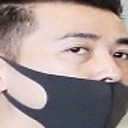

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 72,  70,  73],
        [ 72,  70,  73],
        [ 72,  70,  73],
        ...,
        [249, 247, 248],
        [243, 242, 243],
        [224, 224, 224]],

       [[ 62,  60,  63],
        [ 62,  60,  63],
        [ 62,  60,  63],
        ...,
        [251, 249, 250],
        [250, 249, 251],
        [243, 243, 243]],

       [[ 56,  54,  57],
        [ 56,  54,  57],
        [ 56,  54,  57],
        ...,
        [252, 250, 252],
        [253, 252, 253],
        [250, 250, 250]],

       ...,

       [[  9,  11,  36],
        [  2,   3,  25],
        [  1,   2,  22],
        ...,
        [ 31,  24,  32],
        [ 17,  13,  19],
        [  5,   5,   7]],

       [[ 12,  14,  39],
        [  4,   6,  28],
        [  1,   2,  22],
        ...,
        [ 28,  21,  29],
        [ 19,  15,  21],
        [  6,   6,   8]],

       [[ 15,  17,  41],
        [ 12,  14,  36],
        [  6,   7,  27],
        ...,
        [ 25,  17,  26],
        [ 20,  16,  22],
        [  7,   7,   9]]], dtype=uint8)
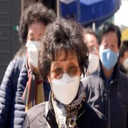

In [31]:
X_train[0]

In [32]:
X_train_scaled[0]

array([[[0.28235294, 0.2745098 , 0.28627451],
        [0.28235294, 0.2745098 , 0.28627451],
        [0.28235294, 0.2745098 , 0.28627451],
        ...,
        [0.97647059, 0.96862745, 0.97254902],
        [0.95294118, 0.94901961, 0.95294118],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.24313725, 0.23529412, 0.24705882],
        [0.24313725, 0.23529412, 0.24705882],
        [0.24313725, 0.23529412, 0.24705882],
        ...,
        [0.98431373, 0.97647059, 0.98039216],
        [0.98039216, 0.97647059, 0.98431373],
        [0.95294118, 0.95294118, 0.95294118]],

       [[0.21960784, 0.21176471, 0.22352941],
        [0.21960784, 0.21176471, 0.22352941],
        [0.21960784, 0.21176471, 0.22352941],
        ...,
        [0.98823529, 0.98039216, 0.98823529],
        [0.99215686, 0.98823529, 0.99215686],
        [0.98039216, 0.98039216, 0.98039216]],

       ...,

       [[0.03529412, 0.04313725, 0.14117647],
        [0.00784314, 0.01176471, 0.09803922],
        [0.00392157, 0

**Building a Convolutional Neural Networks (CNN)**

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - acc: 0.6892 - loss: 0.6841 - val_acc: 0.8512 - val_loss: 0.3229
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8677 - loss: 0.3304 - val_acc: 0.8893 - val_loss: 0.2508
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8957 - loss: 0.2531 - val_acc: 0.8992 - val_loss: 0.2202
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9194 - loss: 0.2157 - val_acc: 0.9157 - val_loss: 0.1897
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9398 - loss: 0.1500 - val_acc: 0.9240 - val_loss: 0.1886


Model Evaluation

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9359 - loss: 0.1725
Test Accuracy = 0.9205824136734009


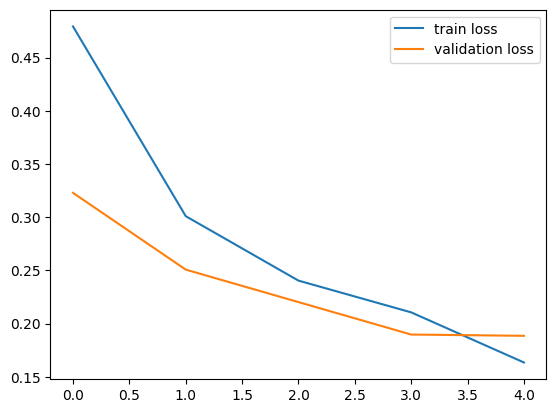

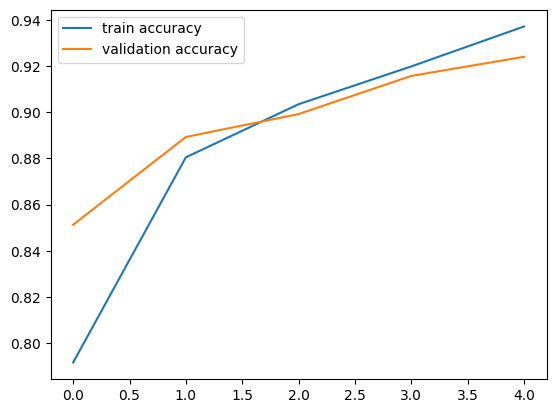

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /how-to-wear-face-mask-right-way.jpg


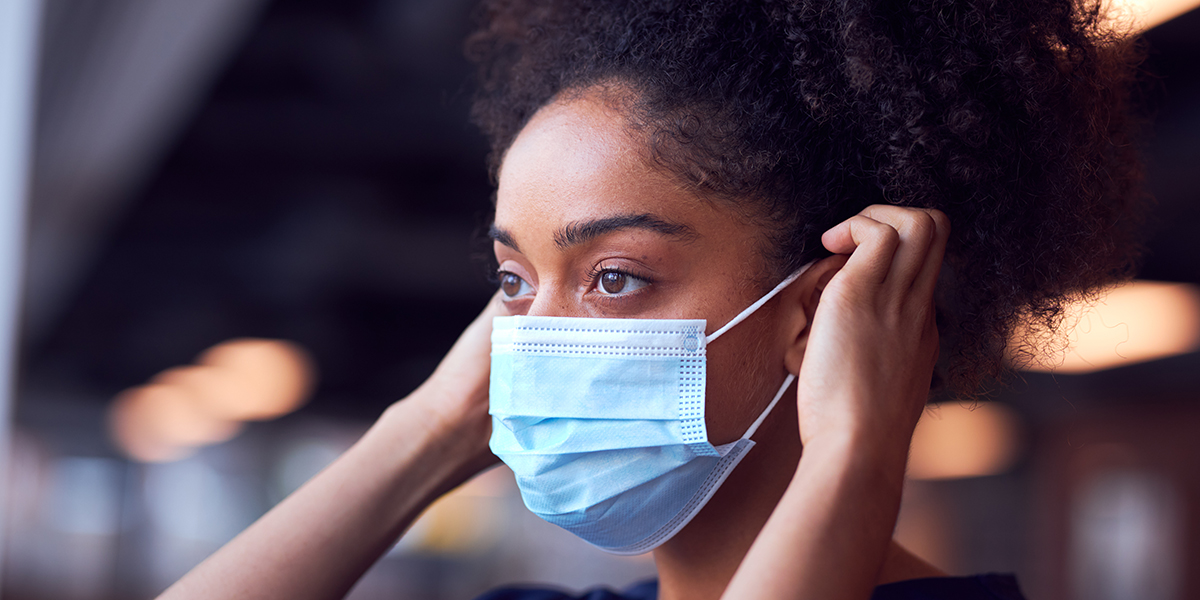

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.38850126 0.73118174]]
1
The person in the image is wearing a mask


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /download.png


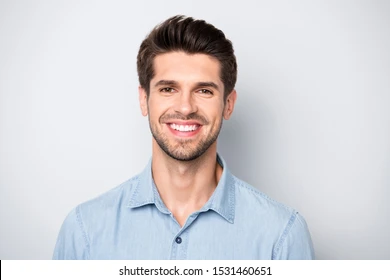

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.49363562 0.46220818]]
0
The person in the image is not wearing a mask


In [53]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')